# Import packages

In [42]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score, silhouette_samples
import sklearn.metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

import itertools

import scipy
from kmodes.kmodes import KModes

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Read in Data

In [43]:
df=pd.read_csv('/System/Volumes/Data/Users/Michael/Library/CloudStorage/iCloud Drive/MMA/MMA 831/allstate-purchase-prediction-challenge/trainsub.csv')

list(df)
df.shape
df.info()
df.describe().transpose()
df.head(n=10)

['customer_ID',
 'shopping_pt',
 'record_type',
 'day',
 'time',
 'state',
 'location',
 'group_size',
 'homeowner',
 'car_age',
 'car_value',
 'risk_factor',
 'age_oldest',
 'age_youngest',
 'married_couple',
 'C_previous',
 'duration_previous',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'cost',
 'plan',
 'hour',
 'timeofday',
 'weekend',
 'family',
 'agediff',
 'individual',
 'stategroup',
 'changed',
 'changelog']

(97009, 35)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97009 entries, 0 to 97008
Data columns (total 35 columns):
customer_ID          97009 non-null int64
shopping_pt          97009 non-null int64
record_type          97009 non-null int64
day                  97009 non-null int64
time                 97009 non-null object
state                97009 non-null object
location             97009 non-null int64
group_size           97009 non-null int64
homeowner            97009 non-null int64
car_age              97009 non-null int64
car_value            97009 non-null object
risk_factor          97009 non-null int64
age_oldest           97009 non-null int64
age_youngest         97009 non-null int64
married_couple       97009 non-null int64
C_previous           97009 non-null object
duration_previous    97009 non-null int64
A                    97009 non-null int64
B                    97009 non-null int64
C                    97009 non-null int64
D                    97009 non-null int64
E    

,count,mean,std,min,25%,50%,75%,max
customer_ID,97009.0,1.007656e+07,44050.904207,10000000.0,10038531.0,10076385.0,10114706.0,10152724.0
shopping_pt,97009.0,6.857601e+00,1.998357,3.0,5.0,7.0,8.0,13.0
record_type,97009.0,1.000000e+00,0.000000,1.0,1.0,1.0,1.0,1.0
day,97009.0,2.082683e+00,1.468060,0.0,1.0,2.0,3.0,6.0
location,97009.0,1.227287e+04,1564.614140,10001.0,10937.0,12031.0,13429.0,16580.0
group_size,97009.0,1.235617e+00,0.461796,1.0,1.0,1.0,1.0,4.0
homeowner,97009.0,5.454855e-01,0.497929,0.0,0.0,1.0,1.0,1.0
car_age,97009.0,8.149326e+00,5.629674,0.0,3.0,8.0,12.0,30.0
risk_factor,97009.0,2.637374e+00,0.936293,1.0,2.0,3.0,3.0,4.0
age_oldest,97009.0,4.518162e+01,17.389647,18.0,29.0,44.0,60.0,75.0


,customer_ID,shopping_pt,record_type,day,time,state,location,group_size,homeowner,car_age,...,plan,hour,timeofday,weekend,family,agediff,individual,stategroup,changed,changelog
0,10000000,9,1,0,12:07,IN,10001,2,0,2,...,1022121,12,day,No,No,4,No,g4,No,False
1,10000005,6,1,3,09:09,NY,10006,1,0,10,...,32002,9,day,No,No,0,Yes,g4,No,False
2,10000007,8,1,4,14:26,PA,10008,1,0,11,...,12001,14,day,No,No,0,Yes,g4,Yes,True
3,10000013,4,1,4,09:31,WV,10014,2,1,3,...,1132113,9,day,No,No,2,No,g3,No,False
4,10000014,6,1,1,17:50,MO,10015,1,0,5,...,1111022,17,evening,No,No,4,No,g4,No,False
5,10000016,10,1,3,13:15,OH,10018,1,0,6,...,2033033,13,day,No,No,0,Yes,g4,Yes,True
6,10000019,8,1,1,11:34,OK,10021,1,0,7,...,2123123,11,day,No,No,0,Yes,g3,Yes,True
7,10000023,7,1,1,14:32,PA,10025,1,1,2,...,1113112,14,day,No,No,0,Yes,g4,No,False
8,10000025,7,1,0,15:26,OH,10027,2,1,15,...,11003,15,day,No,No,35,No,g4,No,False
9,10000026,4,1,3,15:24,OH,10028,2,1,5,...,1133123,15,day,No,No,2,No,g4,No,False


# Normalize the Data

In [44]:
X = df.copy()
X.head(10)
X.info()

,customer_ID,shopping_pt,record_type,day,time,state,location,group_size,homeowner,car_age,...,plan,hour,timeofday,weekend,family,agediff,individual,stategroup,changed,changelog
0,10000000,9,1,0,12:07,IN,10001,2,0,2,...,1022121,12,day,No,No,4,No,g4,No,False
1,10000005,6,1,3,09:09,NY,10006,1,0,10,...,32002,9,day,No,No,0,Yes,g4,No,False
2,10000007,8,1,4,14:26,PA,10008,1,0,11,...,12001,14,day,No,No,0,Yes,g4,Yes,True
3,10000013,4,1,4,09:31,WV,10014,2,1,3,...,1132113,9,day,No,No,2,No,g3,No,False
4,10000014,6,1,1,17:50,MO,10015,1,0,5,...,1111022,17,evening,No,No,4,No,g4,No,False
5,10000016,10,1,3,13:15,OH,10018,1,0,6,...,2033033,13,day,No,No,0,Yes,g4,Yes,True
6,10000019,8,1,1,11:34,OK,10021,1,0,7,...,2123123,11,day,No,No,0,Yes,g3,Yes,True
7,10000023,7,1,1,14:32,PA,10025,1,1,2,...,1113112,14,day,No,No,0,Yes,g4,No,False
8,10000025,7,1,0,15:26,OH,10027,2,1,15,...,11003,15,day,No,No,35,No,g4,No,False
9,10000026,4,1,3,15:24,OH,10028,2,1,5,...,1133123,15,day,No,No,2,No,g4,No,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97009 entries, 0 to 97008
Data columns (total 35 columns):
customer_ID          97009 non-null int64
shopping_pt          97009 non-null int64
record_type          97009 non-null int64
day                  97009 non-null int64
time                 97009 non-null object
state                97009 non-null object
location             97009 non-null int64
group_size           97009 non-null int64
homeowner            97009 non-null int64
car_age              97009 non-null int64
car_value            97009 non-null object
risk_factor          97009 non-null int64
age_oldest           97009 non-null int64
age_youngest         97009 non-null int64
married_couple       97009 non-null int64
C_previous           97009 non-null object
duration_previous    97009 non-null int64
A                    97009 non-null int64
B                    97009 non-null int64
C                    97009 non-null int64
D                    97009 non-null int64
E    

In [45]:
X['state'] = X['state'].astype('category')
X['car_value'] = X['car_value'].astype('category')
X['C_previous'] = X['C_previous'].astype('category')
X['timeofday'] = X['timeofday'].astype('category')
X['weekend'] = X['weekend'].astype('category')
X['family'] = X['family'].astype('category')
X['individual'] = X['individual'].astype('category')
X['stategroup'] = X['stategroup'].astype('category')
X['changed'] = X['changed'].astype('category')
X['changelog'] = X['changelog'].astype('category')

cat_columns = X.select_dtypes(['category']).columns
cat_columns

Index(['state', 'car_value', 'C_previous', 'timeofday', 'weekend', 'family',
       'individual', 'stategroup', 'changed', 'changelog'],
      dtype='object')

In [46]:
X[cat_columns] = X[cat_columns].apply(lambda x: x.cat.codes)

In [47]:
X.head()

,customer_ID,shopping_pt,record_type,day,time,state,location,group_size,homeowner,car_age,...,plan,hour,timeofday,weekend,family,agediff,individual,stategroup,changed,changelog
0,10000000,9,1,0,12:07,10,10001,2,0,2,...,1022121,12,0,0,0,4,0,3,0,0
1,10000005,6,1,3,09:09,23,10006,1,0,10,...,32002,9,0,0,0,0,1,3,0,0
2,10000007,8,1,4,14:26,27,10008,1,0,11,...,12001,14,0,0,0,0,1,3,1,1
3,10000013,4,1,4,09:31,34,10014,2,1,3,...,1132113,9,0,0,0,2,0,2,0,0
4,10000014,6,1,1,17:50,15,10015,1,0,5,...,1111022,17,1,0,0,4,0,3,0,0


In [48]:
scaler = StandardScaler()
features = [e for e in list(X) if e not in ('time','customer_ID','record_type')]
X[features] = scaler.fit_transform(X[features])

In [49]:
X[features].head()

,shopping_pt,day,state,location,group_size,homeowner,car_age,car_value,risk_factor,age_oldest,...,plan,hour,timeofday,weekend,family,agediff,individual,stategroup,changed,changelog
0,1.072086,-1.418670,-0.686552,-1.452038,1.655247,-1.095513,-1.092312,1.270775,0.387302,0.047061,...,0.006284,-0.378731,-0.492279,-0.127509,-0.101385,0.203422,-1.674641,0.241593,-0.673580,-0.673580
1,-0.429155,0.624853,0.600367,-1.448842,-0.510222,-1.095513,0.328737,-0.387383,1.455349,-0.988043,...,-1.567953,-1.450761,-0.492279,-0.127509,-0.101385,-0.338704,0.597143,0.241593,-0.673580,-0.673580
2,0.571672,1.306027,0.996343,-1.447564,-0.510222,-1.095513,0.506368,-2.045542,0.387302,-0.125456,...,-1.599754,0.335956,-0.492279,-0.127509,-0.101385,-0.338704,0.597143,0.241593,1.484604,1.484604
3,-1.429982,1.306027,1.689299,-1.443729,1.655247,0.912814,-0.914680,-1.216463,0.387302,0.967154,...,0.181166,-1.450761,-0.492279,-0.127509,-0.101385,-0.067641,-1.674641,-1.711954,-0.673580,-0.673580
4,-0.429155,-0.737496,-0.191583,-1.443090,-0.510222,-1.095513,-0.559418,-1.216463,0.387302,-0.758019,...,0.147632,1.407987,1.660615,-0.127509,-0.101385,0.203422,-1.674641,0.241593,-0.673580,-0.673580


In [50]:
X[features].iloc[:,1:].head()
X[features].iloc[:,1:].info()

,day,state,location,group_size,homeowner,car_age,car_value,risk_factor,age_oldest,age_youngest,...,plan,hour,timeofday,weekend,family,agediff,individual,stategroup,changed,changelog
0,-1.418670,-0.686552,-1.452038,1.655247,-1.095513,-1.092312,1.270775,0.387302,0.047061,-0.039027,...,0.006284,-0.378731,-0.492279,-0.127509,-0.101385,0.203422,-1.674641,0.241593,-0.673580,-0.673580
1,0.624853,0.600367,-1.448842,-0.510222,-1.095513,0.328737,-0.387383,1.455349,-0.988043,-0.839537,...,-1.567953,-1.450761,-0.492279,-0.127509,-0.101385,-0.338704,0.597143,0.241593,-0.673580,-0.673580
2,1.306027,0.996343,-1.447564,-0.510222,-1.095513,0.506368,-2.045542,0.387302,-0.125456,0.018152,...,-1.599754,0.335956,-0.492279,-0.127509,-0.101385,-0.338704,0.597143,0.241593,1.484604,1.484604
3,1.306027,1.689299,-1.443729,1.655247,0.912814,-0.914680,-1.216463,0.387302,0.967154,0.990199,...,0.181166,-1.450761,-0.492279,-0.127509,-0.101385,-0.067641,-1.674641,-1.711954,-0.673580,-0.673580
4,-0.737496,-0.191583,-1.443090,-0.510222,-1.095513,-0.559418,-1.216463,0.387302,-0.758019,-0.839537,...,0.147632,1.407987,1.660615,-0.127509,-0.101385,0.203422,-1.674641,0.241593,-0.673580,-0.673580


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97009 entries, 0 to 97008
Data columns (total 31 columns):
day                  97009 non-null float64
state                97009 non-null float64
location             97009 non-null float64
group_size           97009 non-null float64
homeowner            97009 non-null float64
car_age              97009 non-null float64
car_value            97009 non-null float64
risk_factor          97009 non-null float64
age_oldest           97009 non-null float64
age_youngest         97009 non-null float64
married_couple       97009 non-null float64
C_previous           97009 non-null float64
duration_previous    97009 non-null float64
A                    97009 non-null float64
B                    97009 non-null float64
C                    97009 non-null float64
D                    97009 non-null float64
E                    97009 non-null float64
F                    97009 non-null float64
G                    97009 non-null float64
cost       

## Elbow Method (Manual)

**Find the best K**

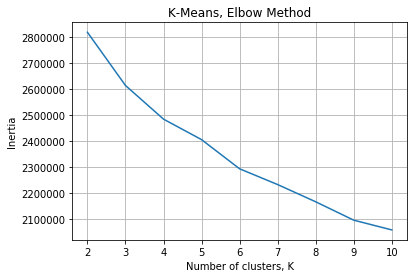

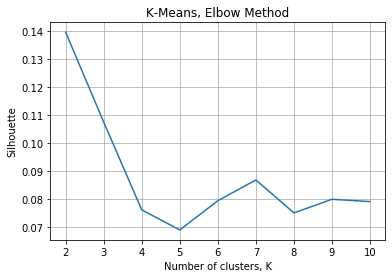

In [52]:
X=X[features]
inertias = {}
silhouettes = {}
for k in range(2, 11):
    kmeans = KMeans(init='k-means++', n_init=10, n_clusters=k, max_iter=1000, random_state=42).fit(X)
    inertias[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    silhouettes[k] = silhouette_score(X, kmeans.labels_, metric='euclidean')
    

plt.figure();
plt.grid(True);
plt.plot(list(inertias.keys()), list(inertias.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Inertia");


plt.figure();
plt.grid(True);
plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Silhouette");

# Clustering with Kmeans

In [53]:
k_means = KMeans(init='k-means++', n_clusters=2, n_init=10, random_state=42)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [54]:
k_means.labels_

array([1, 0, 0, ..., 0, 0, 0], dtype=int32)

In [61]:
df['Group']=k_means.labels_

In [62]:
df.head()

,customer_ID,shopping_pt,record_type,day,time,state,location,group_size,homeowner,car_age,...,hour,timeofday,weekend,family,agediff,individual,stategroup,changed,changelog,Group
0,10000000,9,1,0,12:07,IN,10001,2,0,2,...,12,day,No,No,4,No,g4,No,False,1
1,10000005,6,1,3,09:09,NY,10006,1,0,10,...,9,day,No,No,0,Yes,g4,No,False,0
2,10000007,8,1,4,14:26,PA,10008,1,0,11,...,14,day,No,No,0,Yes,g4,Yes,True,0
3,10000013,4,1,4,09:31,WV,10014,2,1,3,...,9,day,No,No,2,No,g3,No,False,1
4,10000014,6,1,1,17:50,MO,10015,1,0,5,...,17,evening,No,No,4,No,g4,No,False,1


# Export the result

In [63]:
df.to_csv('/System/Volumes/Data/Users/Michael/Library/CloudStorage/iCloud Drive/MMA/MMA 831/allstate-purchase-prediction-challenge/clustering.csv')